In [1]:
# 6.1.3 插值
from scipy.interpolate import interp1d, splrep, splev
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import baostock as bs
#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:' + lg.error_code)
print('login respond  error_msg:' + lg.error_msg)
# 获取茅台的收盘价
maotai = bs.query_history_k_data_plus("sh.600519","date,code,open,high,low,close,preclose,volume,amount,turn,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM", start_date='2018-01-01', end_date='2021-12-31',frequency="d", adjustflag="3")
data_list = []
while (maotai.error_code == '0') & maotai.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(maotai.get_row_data())
mt = pd.DataFrame(data_list, columns=maotai.fields)
print(mt.head(5))
mt['date'] = pd.to_datetime(mt['date'], format = '%Y-%m-%d')
mt['code'] = mt['code'].astype('string')
for each in ['open', 'high', 'low', 'close', 'preclose', 'volume', 'amount', 'turn', 'pctChg', 'peTTM', 'pbMRQ', 'psTTM', 'pcfNcfTTM']:
    mt[each] = mt[each].astype('float')
print(mt.info())

C:\Users\yangsy-c\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\yangsy-c\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


login success!
login respond error_code:0
login respond  error_msg:success
         date       code      open      high       low     close  preclose  \
0  2018-01-02  sh.600519  700.0000  710.1600  689.8900  703.8500  697.4900   
1  2018-01-03  sh.600519  701.5000  721.4000  699.7400  715.8600  703.8500   
2  2018-01-04  sh.600519  721.4000  743.5000  719.3300  737.0700  715.8600   
3  2018-01-05  sh.600519  741.0000  746.0300  728.2200  738.3600  737.0700   
4  2018-01-08  sh.600519  735.0200  756.5000  735.0200  752.1300  738.3600   

    volume           amount      turn    pctChg      peTTM      pbMRQ  \
0  4961248  3482407646.0000  0.394942  0.911839  36.480928  10.481447   
1  5201941  3713523701.0000  0.414102  1.706331  37.103413  10.660295   
2  7220508  5309890210.0000  0.574791  2.962873  38.202738  10.976145   
3  3998907  2946493013.0000  0.318334  0.175014  38.269600  10.995356   
4  5220456  3899951720.0000  0.415576  1.864947  38.983306  11.200413   

       psTTM  pcf

In [2]:
x = mt.date[:30]
y = mt.close[:30]

In [3]:
print(x, y)

0    2018-01-02
1    2018-01-03
2    2018-01-04
3    2018-01-05
4    2018-01-08
5    2018-01-09
6    2018-01-10
7    2018-01-11
8    2018-01-12
9    2018-01-15
10   2018-01-16
11   2018-01-17
12   2018-01-18
13   2018-01-19
14   2018-01-22
15   2018-01-23
16   2018-01-24
17   2018-01-25
18   2018-01-26
19   2018-01-29
20   2018-01-30
21   2018-01-31
22   2018-02-01
23   2018-02-02
24   2018-02-05
25   2018-02-06
26   2018-02-07
27   2018-02-08
28   2018-02-09
29   2018-02-12
Name: date, dtype: datetime64[ns] 0     703.85
1     715.86
2     737.07
3     738.36
4     752.13
5     782.52
6     785.71
7     774.81
8     788.42
9     785.37
10    772.94
11    747.93
12    750.74
13    750.18
14    773.64
15    773.78
16    764.46
17    769.16
18    777.22
19    736.32
20    742.08
21    764.54
22    757.73
23    740.40
24    718.23
25    708.86
26    683.43
27    700.99
28    683.43
29    697.48
Name: close, dtype: float64


ValueError: x and y must have same first dimension, but have shapes (30,) and (34,)

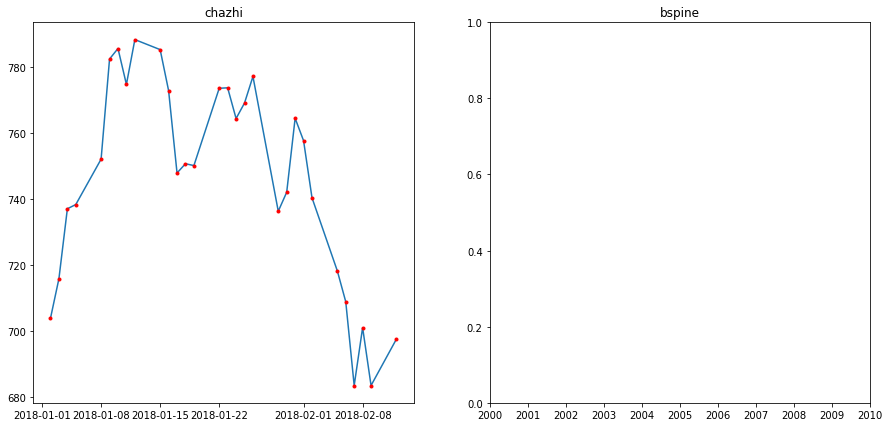

In [23]:
# 示例
_, axs = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))

# 线性插值
linear_interp = interp1d(x, y)
# axs[0]左边
axs[0].set_title("chazhi")
# 相同坐标系下,同样的x,插值的y用红点绘制
axs[0].plot(x, y, '', x, linear_interp.y, 'r.')

# B-spline 插值
splrep_interp = splrep(x, y)
axs[1].set_title("bspine")
axs[1].plot(x, y, '', x, splrep_interp[1], 'g.')


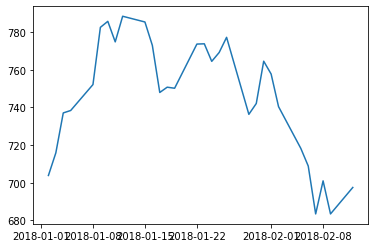

In [15]:
plt.plot(x, linear_interp.y)

In [22]:
splrep_interp = splrep(x, y)
splrep_interp[1]

array([703.85      , 699.77629078, 743.42741844, 736.64459928,
       720.08146997, 789.46007789, 789.44677532, 767.01282085,
       807.59468826, 789.33772979, 778.49200154, 738.67255536,
       754.39777704, 744.02870947, 773.73291195, 776.82690789,
       760.40185812, 768.32565964, 789.87539914, 730.71507188,
       736.59709801, 773.02372564, 758.54799942, 726.24179488,
       718.65005647, 716.87307116, 667.72845303, 757.85778045,
       537.88763489, 697.48      ,   0.        ,   0.        ,
         0.        ,   0.        ])

In [24]:
len(x)

30

In [25]:
# 蒙特卡洛方法和凸优化
"""
Monte Carlo 方法->统计模拟方法,以概率统计理论为指导的数值计算方法;通过使用随机数来解决问题
凸优化,是求取最小值的目标函数为凸函数的优化问题
量化交易,针对多因子的因子重要程度配比,仓位管理,模型的最优参数选择等
"""

'\nMonte Carlo 方法->统计模拟方法,以概率统计理论为指导的数值计算方法;通过使用随机数来解决问题\n凸优化,是求取最小值的目标函数为凸函数的优化问题\n量化交易,针对多因子的因子重要程度配比,仓位管理,模型的最优参数选择等\n'

In [ ]:
from abc import ABCMeta, abstractmethod
import six

k_initial_living_days = 27375

class Person(object):
    def __init__(self):
        self.living = k_initial_living_days
        self.happiness = 0
        self.wealth = 0
        self.fame = 0
        self.living_days = 0
    def living_one_day(self, seek):
        """
        每天追寻的东西,seek,决定你得到什么
        """
        